<center> </center>

<center><font size=5 face="Helvetica" color=#306998><b>
Meep Tutorial: A Bent Waveguide
</b></font></center>

<center><font face="Helvetica" size=3><b>Ang Chen</b></font></center>
<center><font face="Helvetica" size=3>January, 2025</font></center>

***

We'll start a new simulation where we look at the fields propagating through a waveguide bend, and we'll do a couple of other things differently as well. 

In [1]:
from IPython.display import Video
import matplotlib.pyplot as plt
import meep as mp
import numpy as np

plt.rcParams["font.family"] = "Helvetica"
%matplotlib inline
%config InlineBackend.figure_format='svg'

Let's set up the bent waveguide in a slightly larger cell:

In [2]:
cell = mp.Vector3(16, 16, 0)
geometry = [
    mp.Block(
        mp.Vector3(12, 1, mp.inf),
        center=mp.Vector3(-2.5, -3.5),
        material=mp.Medium(epsilon=12),
    ),
    mp.Block(
        mp.Vector3(1, 12, mp.inf),
        center=mp.Vector3(3.5, 2),
        material=mp.Medium(epsilon=12),
    ),
]
pml_layers = [mp.PML(1.0)]
resolution = 10

Note that we have two blocks, both off-center to produce the bent waveguide structure pictured below. As illustrated in the figure, the origin (0,0) of the coordinate system is at the center of the cell, with positive $y$ being downwards, and thus the block of size 12$\times$1 is centered at (-2,-3.5). Also shown in green is the source plane at $x=−7$ which is shifted to $y=−3.5$ so that it is still inside the waveguide.

There are a couple of items to note. First, a point source does not couple very efficiently to the waveguide mode, so we'll expand this into a line source, centered at (-7,-3.5), with the same width as the waveguide by adding a `size` property to the source. This is shown in green in the figure above. An eigenmode source can also be used which is described in Tutorial/Optical Forces. Second, instead of turning the source on suddenly at t=0 which excites many other frequencies because of the discontinuity, we will ramp it on slowly. Meep uses a hyperbolic tangent (tanh) turn-on function over a time proportional to the `width` of 20 time units which is a little over three periods. Finally, just for variety, we'll specify the vacuum wavelength instead of the frequency; again, we'll use a wavelength such that the waveguide is half a wavelength wide.

In [3]:
sources = [
    mp.Source(
        mp.ContinuousSource(wavelength=2 * (11**0.5), width=20),
        component=mp.Ez,
        center=mp.Vector3(-7, -3.5),
        size=mp.Vector3(0, 1),
    )
]

Now we'll set up and visualize the simulation domain.

In [4]:
sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
)

     block, center = (-2.5,-3.5,0)
          size (12,1,1e+20)


          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     block, center = (3.5,2,0)
          size (1,12,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)


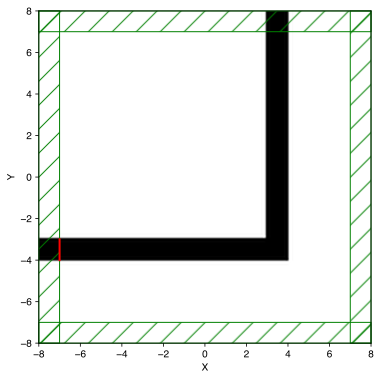

In [5]:
f = plt.figure(figsize=(8, 6))
sim.plot2D()
plt.show()

As we expect, we see the bent waveguide structure with PML boundaries (green) and a source (red) with the same size as the waveguide width.

In [6]:
f = plt.figure(figsize=(8, 6))
Animate = mp.Animate2D(fields=mp.Ez, f=f, realtime=False, normalize=True)
sim.run(mp.at_every(0.5, Animate), until=100)
plt.close()

-----------
Initializing structure...
time for choose_chunkdivision = 7.79629e-05 s
Working in 2D dimensions.
Computational cell is 16 x 16 x 0 with resolution 10
     block, center = (-2.5,-3.5,0)
          size (12,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     block, center = (3.5,2,0)
          size (1,12,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.0147388 s
-----------


FloatProgress(value=0.0, description='0% done ')

     block, center = (-2.5,-3.5,0)
          size (12,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     block, center = (3.5,2,0)
          size (1,12,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
Normalizing field data...
run 0 finished at t = 100.0 (2000 timesteps)


In [7]:
filename = "media/bent_waveguide.mp4"
fps = 10
Animate.to_mp4(fps, filename)


Generating MP4...


In [8]:
Video(filename)

It is clear that the transmission around the bend is rather low for this frequency and structure — both large reflection and large radiation loss are clearly visible. Moreover, since we are operating just barely below the cutoff for single-mode behavior, we are able to excite a second leaky mode after the waveguide bend, whose second-order mode pattern (superimposed with the fundamental mode) is apparent in the animation. 

Below, we show a field snapshot from a simulation with a larger cell along the y direction, in which you can see that the second-order leaky mode decays away, leaving us with the fundamental mode propagating upward.

In [9]:
sim.reset_meep()
cell = mp.Vector3(16, 40, 0)
geometry = [
    mp.Block(
        mp.Vector3(12, 1, mp.inf),
        center=mp.Vector3(-2.5, -3.5),
        material=mp.Medium(epsilon=12),
    ),
    mp.Block(
        mp.Vector3(1, 42, mp.inf),
        center=mp.Vector3(3.5, 17),
        material=mp.Medium(epsilon=12),
    ),
]
sim.cell_size = cell
sim.geometry = geometry
sim.geometry_center = mp.Vector3(0, 12, 0)

sim.run(until=400)


-----------
Initializing structure...
time for choose_chunkdivision = 7.39098e-05 s
Working in 2D dimensions.
Computational cell is 16 x 40 x 0 with resolution 10
     block, center = (-2.5,-3.5,0)
          size (12,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     block, center = (3.5,17,0)
          size (1,42,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.03442 s
-----------


FloatProgress(value=0.0, description='0% done ', max=400.0)

run 1 finished at t = 400.0 (8000 timesteps)


     block, center = (-2.5,-3.5,0)
          size (12,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     block, center = (3.5,17,0)
          size (1,42,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)


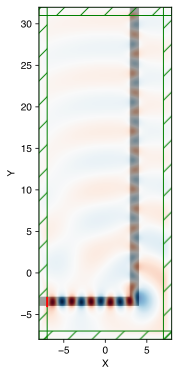

In [10]:
plt.figure(figsize=(8,6))
sim.plot2D(fields=mp.Ez)
plt.show()

Instead of doing an animation, another interesting possibility is to make an image from a $x\times t$ slice. To get the $y=−3.5$ slice, which gives us an image of the fields in the first waveguide branch as a function of time, we can use `get_array` in a step function to collect a slice for each time step

In [11]:
vals = []


def get_slice(sim):
    vals.append(
        sim.get_array(
            center=mp.Vector3(0, -3.5), size=mp.Vector3(16, 0), component=mp.Ez
        )
    )

Get the h5 files

In [22]:
sim.reset_meep()
sim.use_output_directory('bent_waveguide_out')
sim.run(mp.at_beginning(mp.output_epsilon),
        mp.to_appended("ez", mp.at_every(0.6, mp.output_efield_z)),
        until=200)

-----------
Initializing structure...
time for choose_chunkdivision = 7.10487e-05 s
Working in 2D dimensions.
Computational cell is 16 x 40 x 0 with resolution 10
     block, center = (-2.5,-3.5,0)
          size (12,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     block, center = (3.5,17,0)
          size (1,42,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.0382149 s
-----------
Meep: using output directory '-out'
Meep: using output directory 'test'
Meep: using output directory 'bent_waveguide_out'


FloatProgress(value=0.0, description='0% done ', max=200.0)

creating output file "bent_waveguide_out/eps-000000.00.h5"...
creating output file "bent_waveguide_out/ez.h5"...
run 7 finished at t = 200.0 (4000 timesteps)


In [23]:
sim.reset_meep()
sim.run(mp.at_beginning(mp.output_epsilon),
        mp.at_every(0.6, get_slice),
        until=200)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000243187 s
Working in 2D dimensions.
Computational cell is 16 x 40 x 0 with resolution 10
     block, center = (-2.5,-3.5,0)
          size (12,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     block, center = (3.5,17,0)
          size (1,42,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.032701 s
-----------
Meep: using output directory '-out'
Meep: using output directory 'test'
Meep: using output directory 'bent_waveguide_out'


FloatProgress(value=0.0, description='0% done ', max=200.0)

creating output file "bent_waveguide_out/eps-000000.00.h5"...
run 8 finished at t = 200.0 (4000 timesteps)


In [24]:
sim.reset_meep()
sim.run(mp.at_every(0.6, mp.output_png(mp.Ez, "-Zc dkbluered")), until=200)

-----------
Initializing structure...
time for choose_chunkdivision = 6.69956e-05 s
Working in 2D dimensions.
Computational cell is 16 x 40 x 0 with resolution 10
     block, center = (-2.5,-3.5,0)
          size (12,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     block, center = (3.5,17,0)
          size (1,42,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.032501 s
-----------
Meep: using output directory '-out'
Meep: using output directory 'test'
Meep: using output directory 'bent_waveguide_out'


FloatProgress(value=0.0, description='0% done ', max=200.0)

creating output file "bent_waveguide_out/ez-000000.60.h5"...
creating output file "bent_waveguide_out/ez-000001.20.h5"...
creating output file "bent_waveguide_out/ez-000001.80.h5"...
creating output file "bent_waveguide_out/ez-000002.40.h5"...
creating output file "bent_waveguide_out/ez-000003.00.h5"...
creating output file "bent_waveguide_out/ez-000003.60.h5"...
creating output file "bent_waveguide_out/ez-000004.20.h5"...
creating output file "bent_waveguide_out/ez-000004.80.h5"...
creating output file "bent_waveguide_out/ez-000005.40.h5"...
creating output file "bent_waveguide_out/ez-000006.00.h5"...
creating output file "bent_waveguide_out/ez-000006.60.h5"...
creating output file "bent_waveguide_out/ez-000007.20.h5"...
creating output file "bent_waveguide_out/ez-000007.80.h5"...
creating output file "bent_waveguide_out/ez-000008.40.h5"...
creating output file "bent_waveguide_out/ez-000009.00.h5"...
creating output file "bent_waveguide_out/ez-000009.60.h5"...
creating output file "be

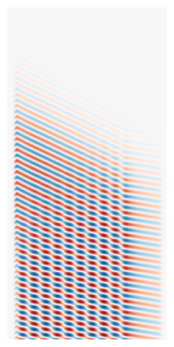

In [19]:
plt.figure(figsize=(8, 6))
plt.imshow(vals, interpolation="spline36", cmap="RdBu", alpha=0.9)
plt.axis("off")
plt.show()

Use h5 files to generate some gifs

In [25]:
!h5ls bent_waveguide_out/ez.h5

ez                       Dataset {160, 400, 333/Inf}


In [26]:
!h5topng -t 0:332 -R -Zc dkbluered -a yarg -A bent_waveguide_out/eps-000000.00.h5 bent_waveguide_out/ez.h5
!mv bent_waveguide_out/ez.*.png figures/

In [27]:
!magick figures/ez.t*.png ez_h5.gif

In [28]:
!magick bent_waveguide_out/ez-*.png ez_png.gif